In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("agriculture.csv")

In [3]:
data.head()

,Unnamed: 0,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
0,0,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300,9400,1.287671
1,1,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300,1000,0.303030
2,2,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100,10200,1.009901
3,3,kharif,maize,80,40,20,5.62,654.34,29.266667,2800,4900,1.750000
4,4,kharif,moong,20,40,20,5.68,654.34,29.266667,1300,500,0.384615


In [4]:
data.tail()

,Unnamed: 0,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
9996,9996,summer,maize,80,40,20,5.40,34.81,34.666667,152,154,1.013158
9997,9997,summer,moong,20,40,20,5.60,34.81,34.666667,488,211,0.432377
9998,9998,whole year,onion,120,60,65,5.94,689.88,29.037273,752,9080,12.074468
9999,9999,whole year,potato,180,60,90,5.02,689.88,29.037273,7595,167455,22.048058
10000,10000,kharif,maize,80,40,20,5.48,579.75,34.010000,11247,3385,0.300969


In [5]:
data = data.drop(columns=['Unnamed: 0'],errors='ignore')

In [6]:
print(data.shape)
data.info()

(10001, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crop_Type           10001 non-null  object 
 1   Crop                10001 non-null  object 
 2   N                   10001 non-null  int64  
 3   P                   10001 non-null  int64  
 4   K                   10001 non-null  int64  
 5   pH                  10001 non-null  float64
 6   rainfall            10001 non-null  float64
 7   temperature         10001 non-null  float64
 8   Area_in_hectares    10001 non-null  int64  
 9   Production_in_tons  10001 non-null  int64  
 10  target              10001 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 859.6+ KB


In [7]:
print(data.describe())
data.describe(include=object)

                  N             P             K            pH      rainfall  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean      69.146585     41.527847     39.709029      5.645313    670.237772   
std       37.197031     13.998587     26.615039      0.487916    604.413140   
min       10.000000     10.000000     20.000000      4.820000      3.274569   
25%       50.000000     40.000000     20.000000      5.360000    157.310000   
50%       80.000000     40.000000     30.000000      5.540000    579.750000   
75%       80.000000     50.000000     40.000000      5.900000   1011.490000   
max      180.000000     75.000000    150.000000      7.000000   3041.400000   

        temperature  Area_in_hectares  Production_in_tons       target   
count  10001.000000      10001.000000        1.000100e+04  10001.000000  
mean      26.752053      18956.858714        3.886877e+04      4.128522  
std        5.078345      45938.016774        1.134659e+05     30.2

,Crop_Type,Crop
count,10001,10001
unique,4,27
top,kharif,rice
freq,4034,1250


In [8]:
data.describe(include='all')


,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
count,10001,10001,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,1.000100e+04,10001.000000
unique,4,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,kharif,rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4034,1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,69.146585,41.527847,39.709029,5.645313,670.237772,26.752053,18956.858714,3.886877e+04,4.128522
std,NaN,NaN,37.197031,13.998587,26.615039,0.487916,604.413140,5.078345,45938.016774,1.134659e+05,30.233001
min,NaN,NaN,10.000000,10.000000,20.000000,4.820000,3.274569,1.180000,1.000000,1.000000e+00,0.000514
25%,NaN,NaN,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,193.000000,2.000000e+02,0.571429
50%,NaN,NaN,80.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1638.000000,2.000000e+03,1.180132
75%,NaN,NaN,80.000000,50.000000,40.000000,5.900000,1011.490000,29.566667,11435.000000,1.810000e+04,2.393728


In [9]:
for i in data.columns:
    print("unique in",i,':',data[i].unique())

unique in Crop_Type : ['kharif' 'rabi' 'summer' 'whole year']
unique in Crop : ['cotton' 'horsegram' 'jowar' 'maize' 'moong' 'ragi' 'rice' 'sunflower'
 'wheat' 'sesamum' 'soyabean' 'rapeseed' 'jute' 'arecanut' 'onion'
 'potato' 'sweetpotato' 'tapioca' 'turmeric' 'barley' 'banana' 'coriander'
 'garlic' 'blackpepper' 'cardamom' 'cashewnuts' 'blackgram']
unique in N : [120  20  80  50  60  30 100 180  90  25  70  10  75  40]
unique in P : [40 60 30 15 20 50 75 10]
unique in K : [ 20  40  30 140  65  90 120  50 100  45  60 150]
unique in pH : [5.46 6.18 5.42 5.62 5.68 5.64 5.54 5.36 6.   5.5  5.6  5.32 6.4  5.98
 5.4  5.9  5.48 5.38 5.66 5.58 5.34 6.34 5.56 5.94 6.42 6.48 5.44 6.02
 6.68 5.52 6.6  5.82 6.44 6.08 6.7  6.46 6.1  6.5  6.54 6.66 6.36 5.84
 6.64 6.04 5.14 6.3  6.38 4.96 6.12 4.94 5.18 6.8  6.56 5.08 6.32 4.9
 7.   6.58 4.98 5.02 4.92 6.62 5.12 4.82 4.88 4.84 5.04 6.06 5.   5.88
 6.14 6.11 5.1  5.06 4.86 6.16 5.86 6.9  6.52 5.16 5.96 5.92]
unique in rainfall : [ 654.34      288.

In [10]:
print(data.isnull().values.any())

False


In [11]:
print(data.isna().sum())

Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
target                0
dtype: int64


In [12]:
data.duplicated().sum()

np.int64(0)

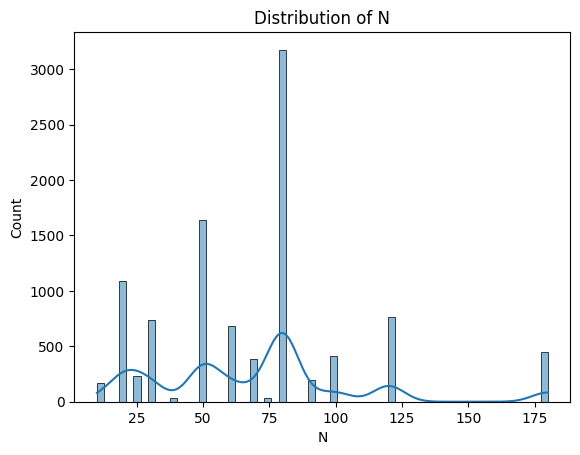

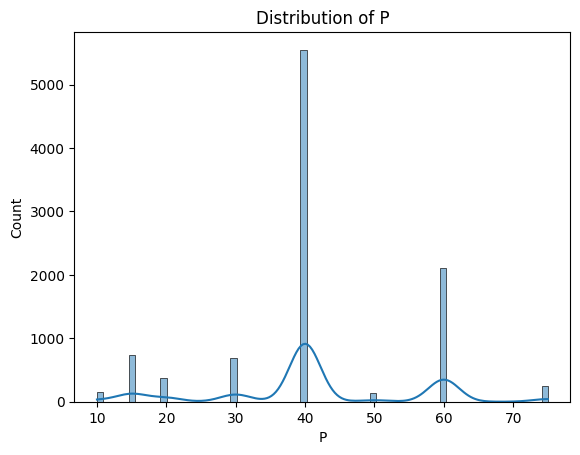

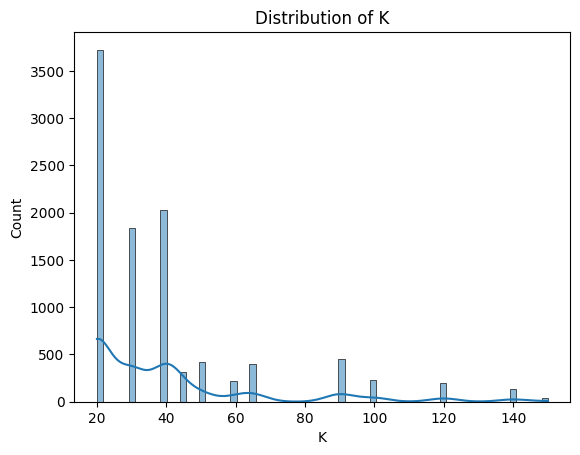

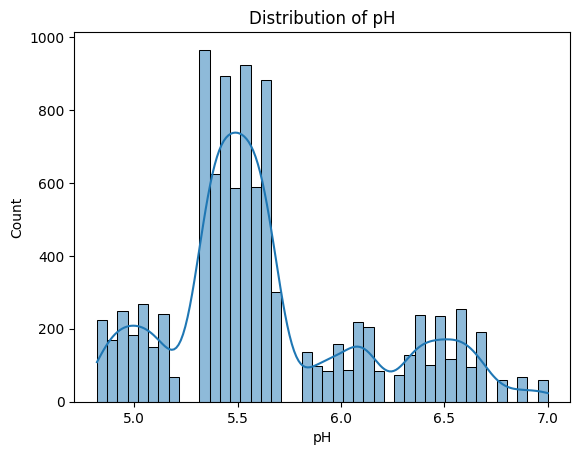

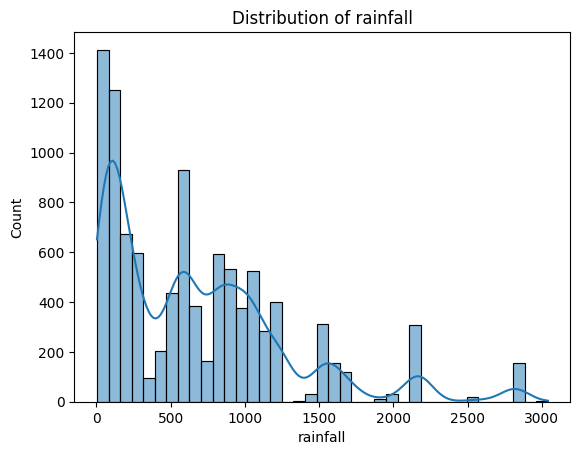

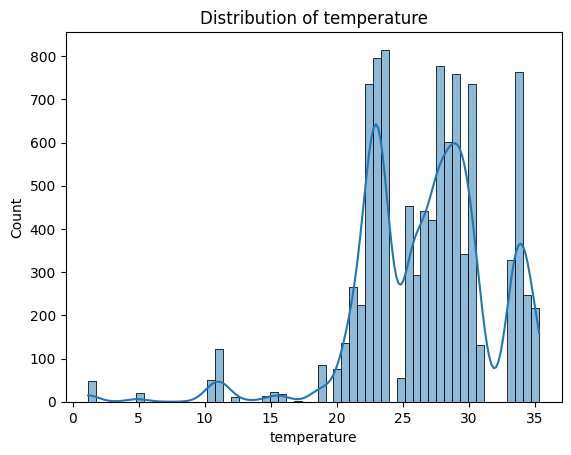

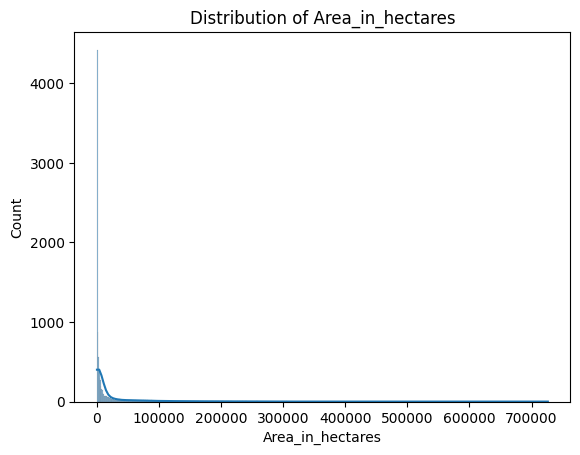

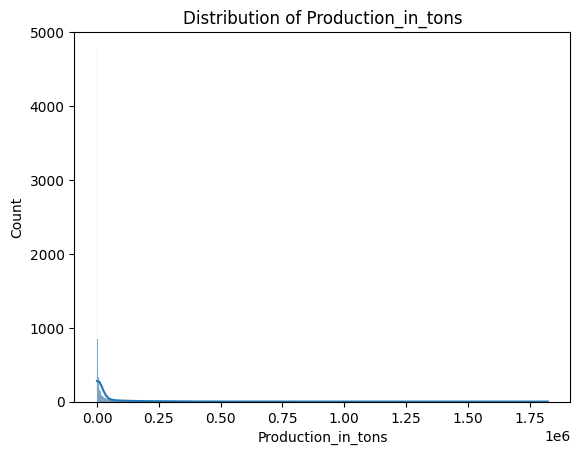

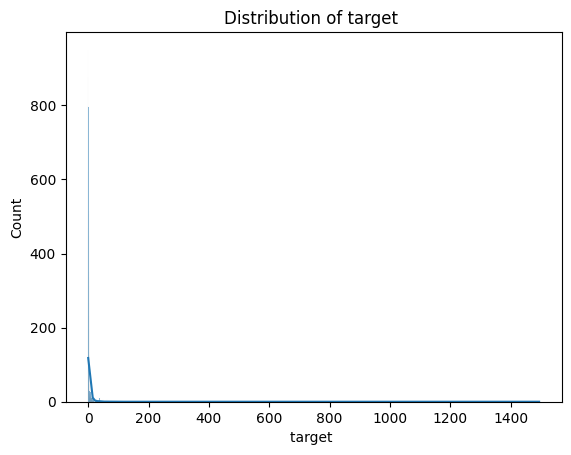

In [13]:
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


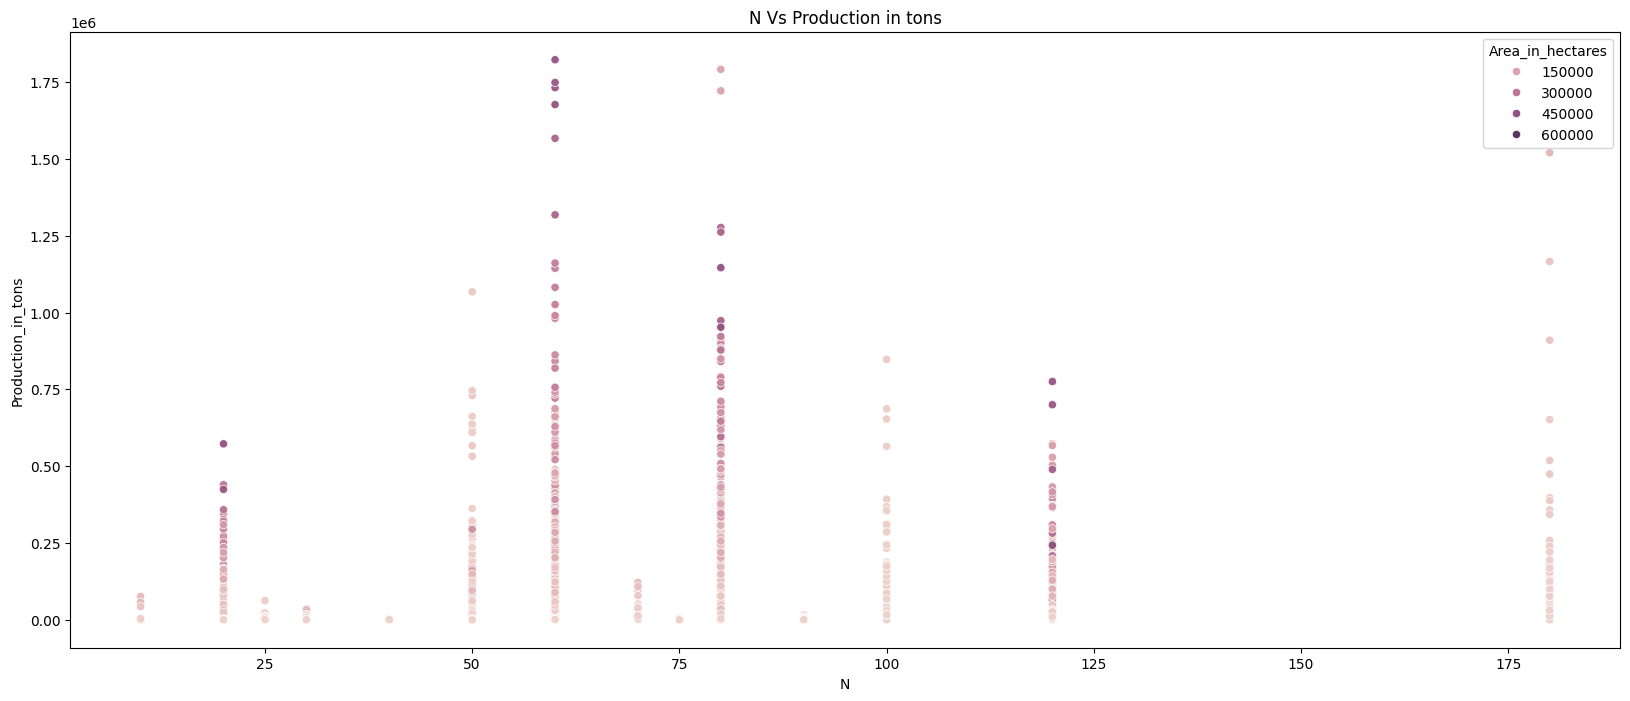

Skewness: 0.9547164852502035
Mean: 69
Median: 80.0
Minimum production: 10
Maximum production: 180


In [14]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='N', y='Production_in_tons', data=data, hue='Area_in_hectares')
plt.title('N Vs Production in tons')
plt.xlabel('N')
plt.ylabel('Production_in_tons')
plt.show()
print(f'Skewness: {data["N"].skew()}')
print(f'Mean: {(data["N"].mean()):.0f}')
print(f'Median: {data["N"].median()}')
print(f'Minimum production: {data["N"].min()}')
print(f'Maximum production: {data["N"].max()}')

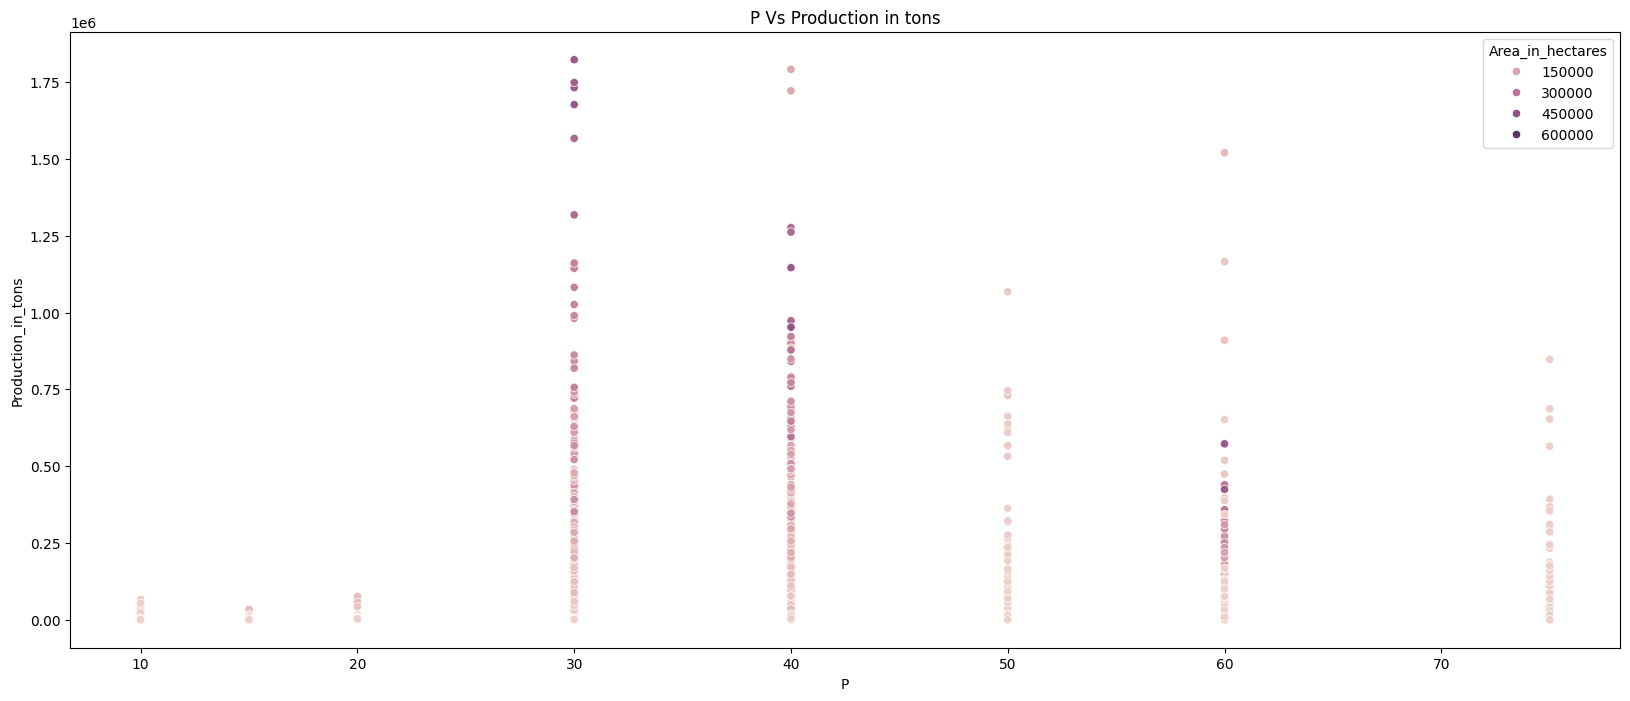

Skewness: -0.01643855245891474
Mean: 42
Median: 40.0
Minimum production: 10
Maximum production: 75


In [15]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='P', y='Production_in_tons', data=data, hue='Area_in_hectares')
plt.title('P Vs Production in tons')
plt.xlabel('P')
plt.ylabel('Production_in_tons')
plt.show()
print(f'Skewness: {data["P"].skew()}')
print(f'Mean: {(data["P"].mean()):.0f}')
print(f'Median: {data["P"].median()}')
print(f'Minimum production: {data["P"].min()}')
print(f'Maximum production: {data["P"].max()}')

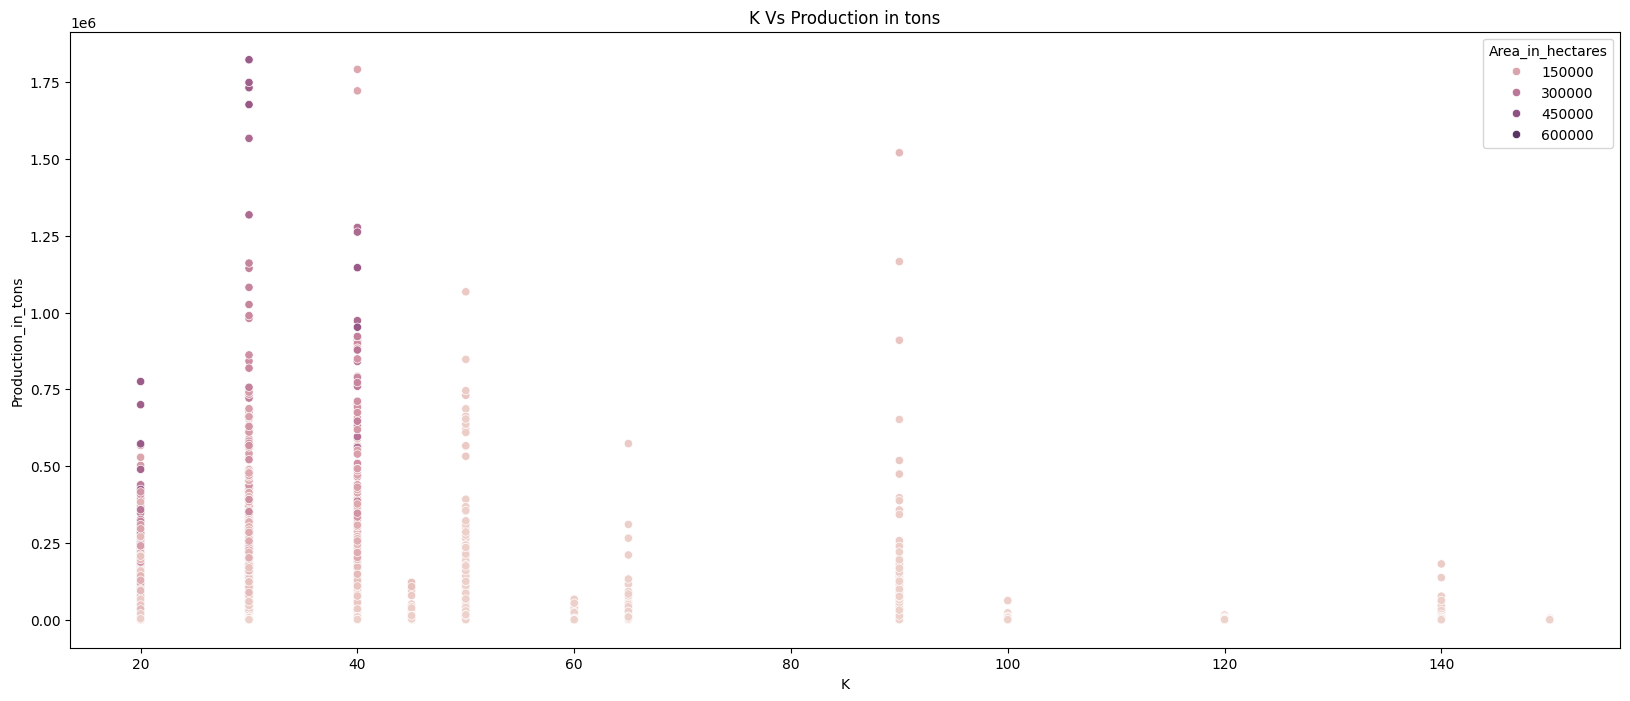

Skewness: 1.989466468450195
Mean: 40
Median: 30.0
Minimum production: 20
Maximum production: 150


In [16]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='K', y='Production_in_tons', data=data, hue='Area_in_hectares')
plt.title('K Vs Production in tons')
plt.xlabel('K')
plt.ylabel('Production_in_tons')
plt.show()
print(f'Skewness: {data["K"].skew()}')
print(f'Mean: {(data["K"].mean()):.0f}')
print(f'Median: {data["K"].median()}')
print(f'Minimum production: {data["K"].min()}')
print(f'Maximum production: {data["K"].max()}')

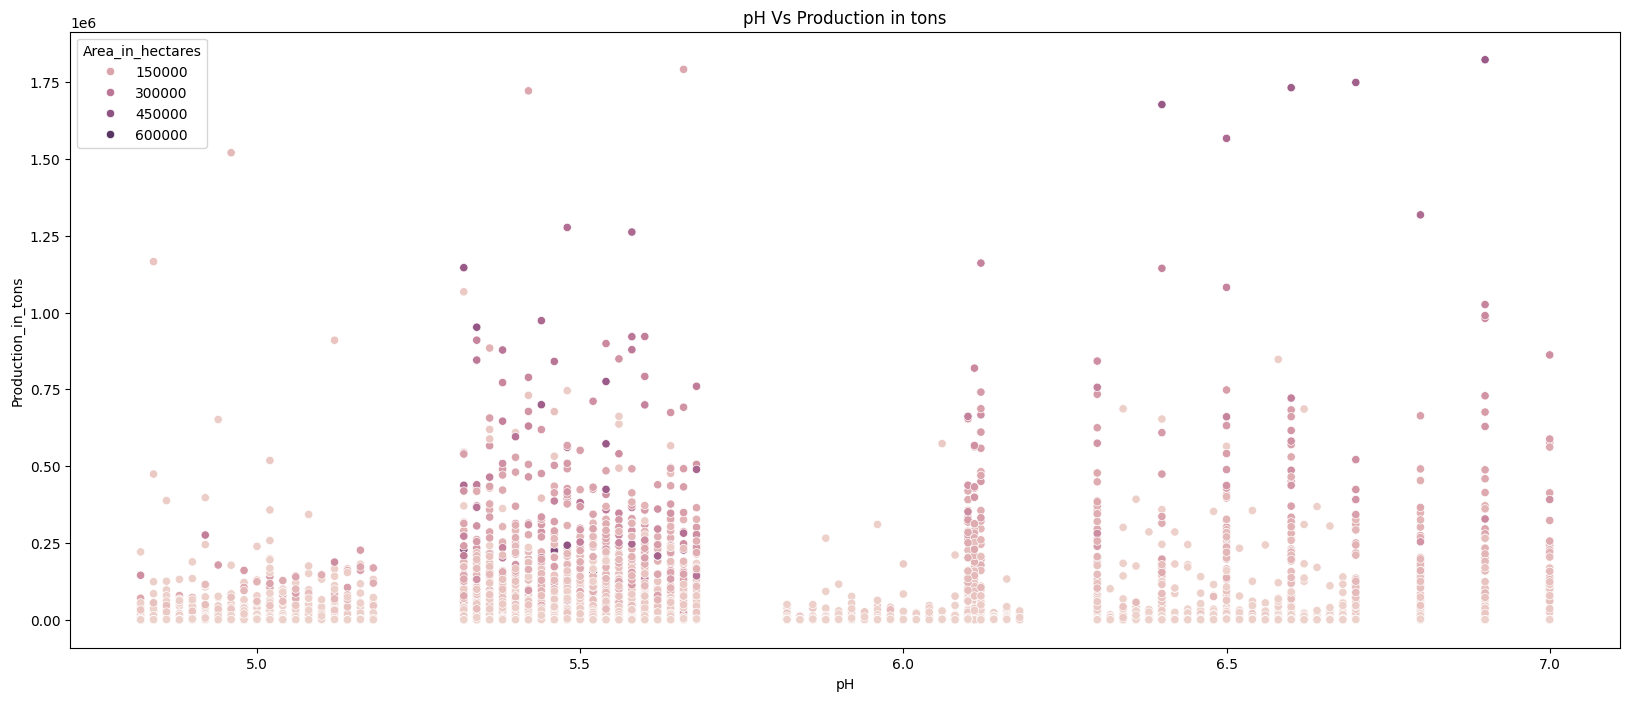

Skewness: 0.7599319343153695
Mean: 6
Median: 5.54
Minimum production: 4.82
Maximum production: 7.0


In [17]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='pH', y='Production_in_tons', data=data, hue='Area_in_hectares')
plt.title('pH Vs Production in tons')
plt.xlabel('pH')
plt.ylabel('Production_in_tons')
plt.show()
print(f'Skewness: {data["pH"].skew()}')
print(f'Mean: {(data["pH"].mean()):.0f}')
print(f'Median: {data["pH"].median()}')
print(f'Minimum production: {data["pH"].min()}')
print(f'Maximum production: {data["pH"].max()}')

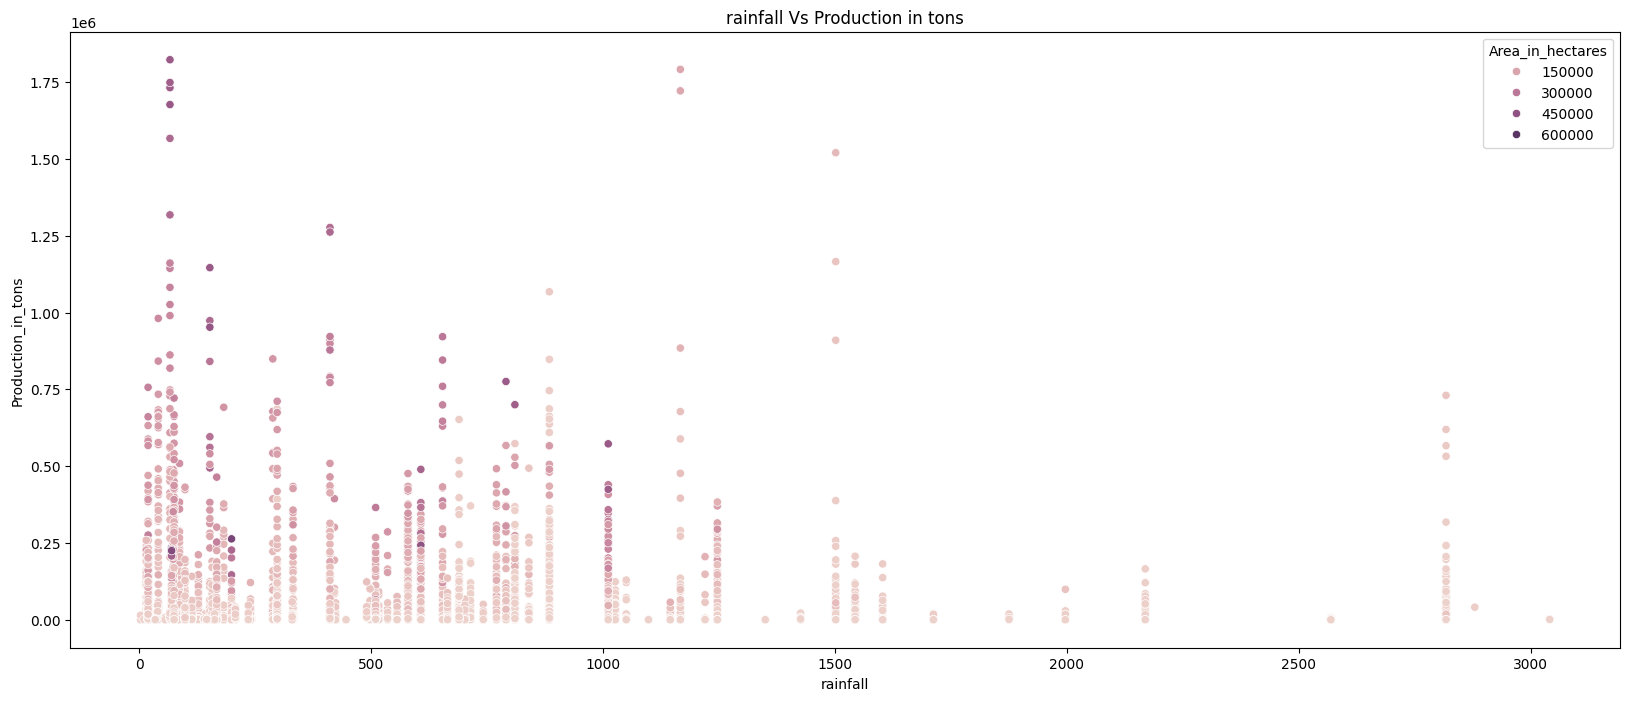

Skewness: 1.268531509612503
Mean: 670
Median: 579.75
Minimum production: 3.274569
Maximum production: 3041.4


In [18]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='rainfall', y='Production_in_tons', data=data, hue='Area_in_hectares')
plt.title('rainfall Vs Production in tons')
plt.xlabel('rainfall')
plt.ylabel('Production_in_tons')
plt.show()
print(f'Skewness: {data["rainfall"].skew()}')
print(f'Mean: {(data["rainfall"].mean()):.0f}')
print(f'Median: {data["rainfall"].median()}')
print(f'Minimum production: {data["rainfall"].min()}')
print(f'Maximum production: {data["rainfall"].max()}')

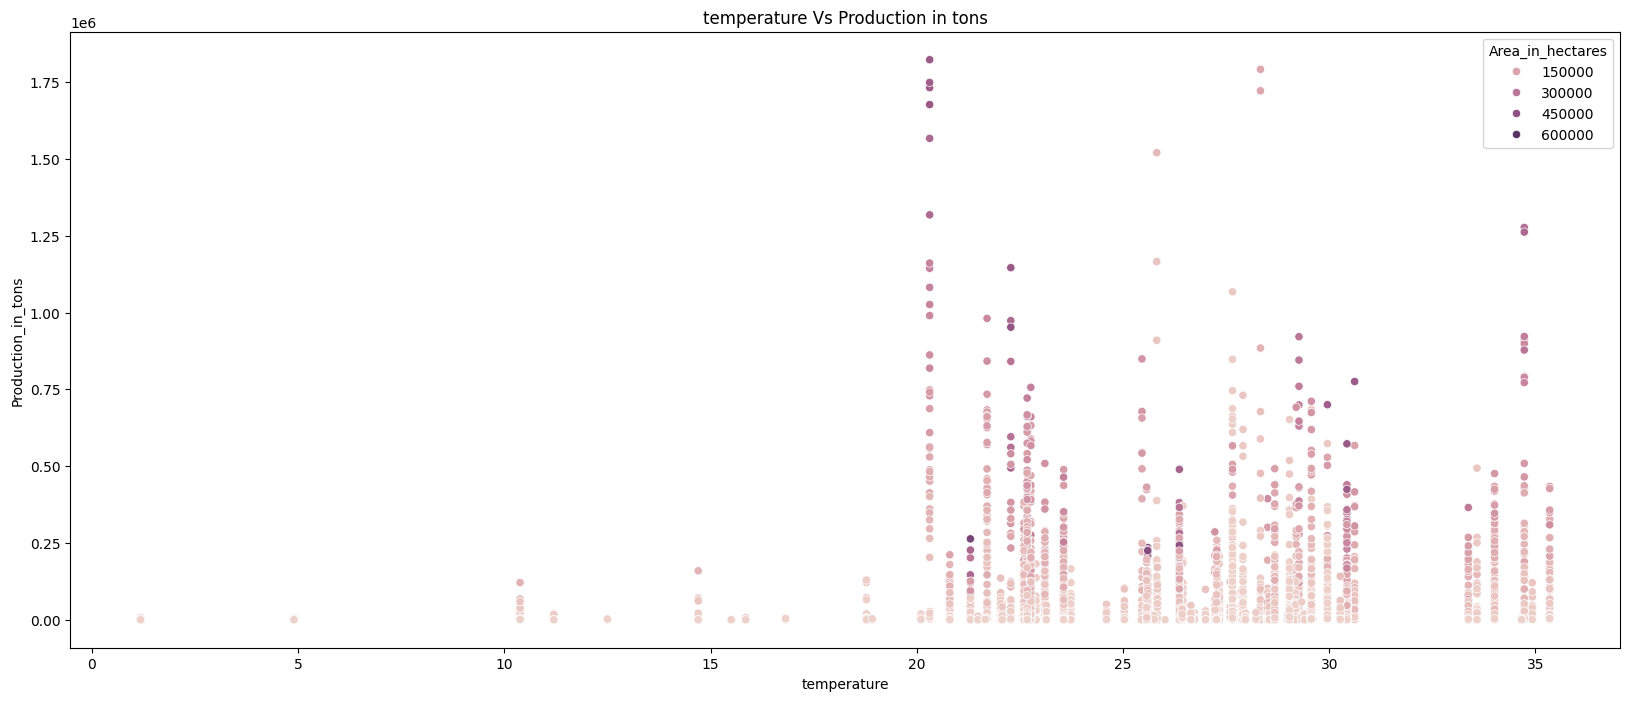

Skewness: -1.0836069029134547
Mean: 27
Median: 27.33333333
Minimum production: 1.18
Maximum production: 35.34666667


In [19]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='temperature', y='Production_in_tons', data=data, hue='Area_in_hectares')
plt.title('temperature Vs Production in tons')
plt.xlabel('temperature')
plt.ylabel('Production_in_tons')
plt.show()
print(f'Skewness: {data["temperature"].skew()}')
print(f'Mean: {(data["temperature"].mean()):.0f}')
print(f'Median: {data["temperature"].median()}')
print(f'Minimum production: {data["temperature"].min()}')
print(f'Maximum production: {data["temperature"].max()}')

Text(0, 0.5, 'Production in tons')

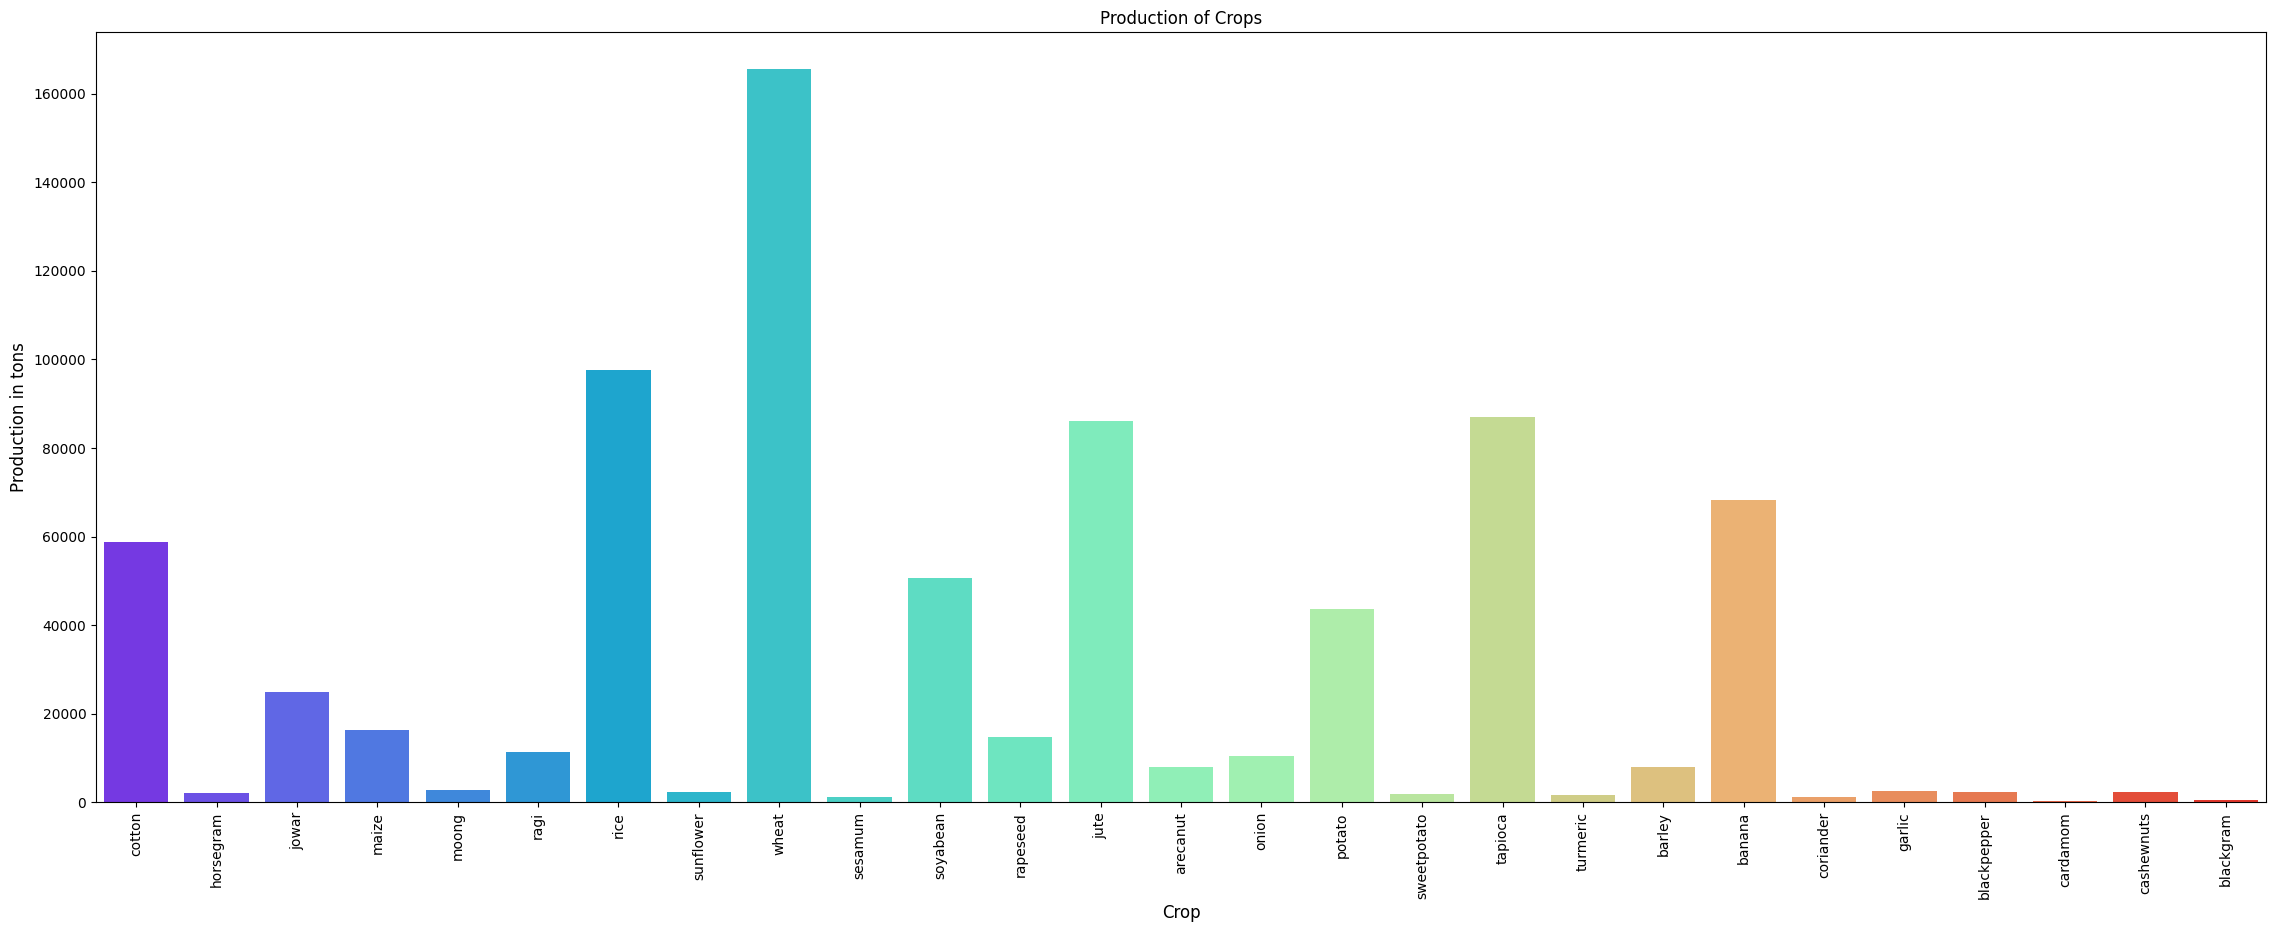

In [20]:
fig = plt.figure(figsize = (28,10))
plt.title('Production of Crops')
sns.barplot(y = 'Production_in_tons', 
            x = 'Crop', 
            data = data,
            ci = None,
            palette='rainbow')
# set labels
plt.xticks(rotation=90) 
plt.xlabel("Crop", size=12)
plt.ylabel("Production in tons", size=12)

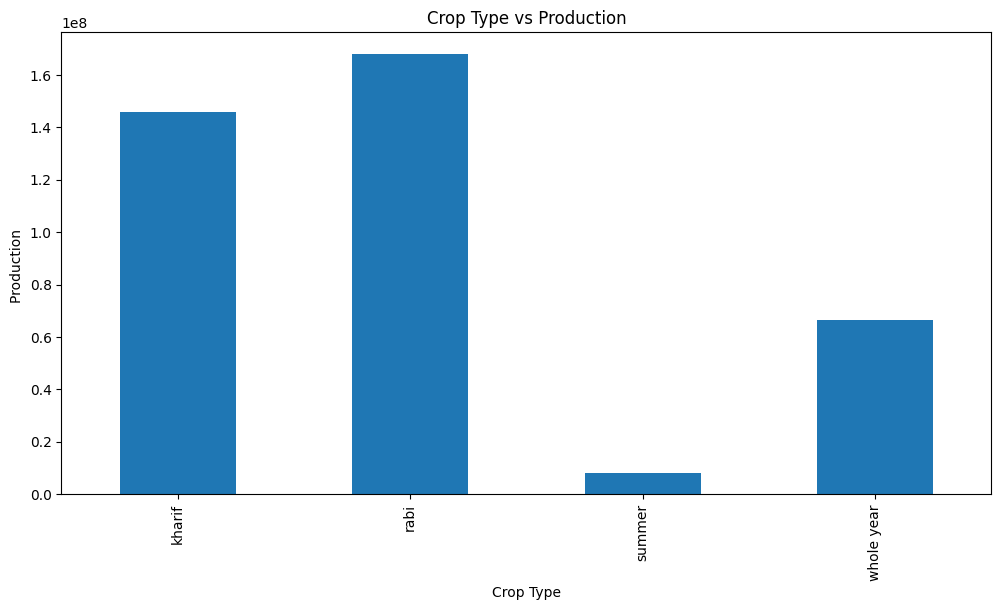

In [21]:
job_claim = data.groupby('Crop_Type')['Production_in_tons'].sum()
plt.figure(figsize=(12, 6))
job_claim.plot(kind='bar', stacked=True)
plt.xlabel('Crop Type')
plt.ylabel('Production ')
plt.xticks(rotation=90)
plt.title('Crop Type vs Production')
plt.show()

In [22]:
cat_col=['Crop_Type','Crop']
num_col = ['N','P','K','pH','rainfall','temperature','Area_in_hectares','Production_in_tons']

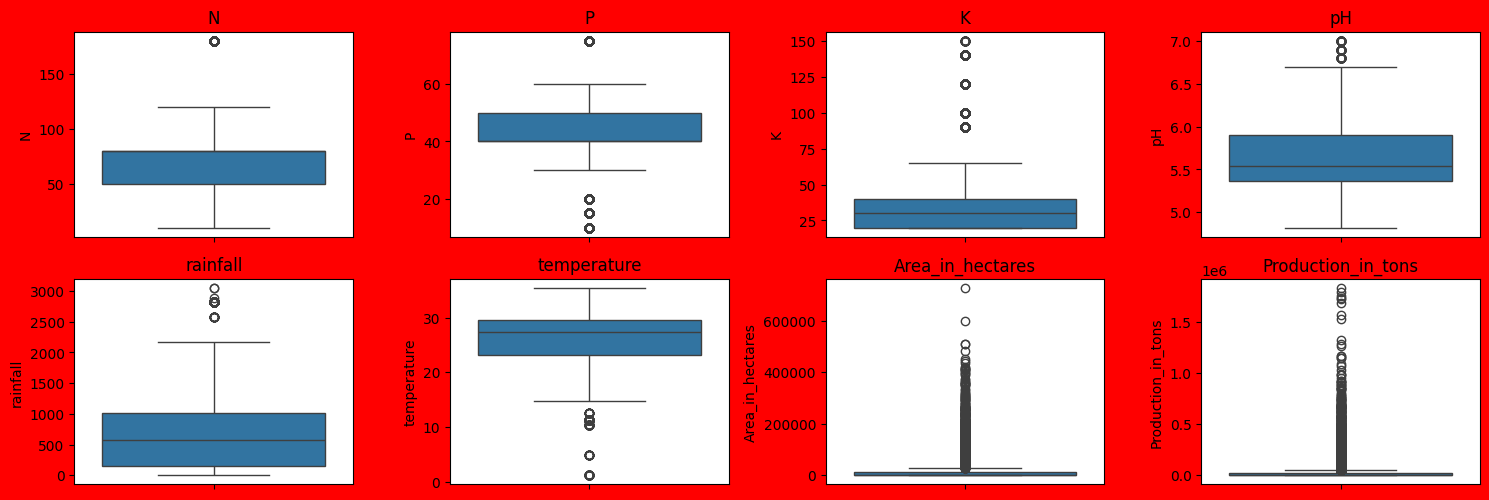

In [23]:
plt.figure(figsize=(15, 10),facecolor='red')

for i, column in enumerate(num_col, 1):
    plt.subplot(4, 4, i) 
    sns.boxplot(data=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [24]:
for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[col] = np.where(data[col] < lower_bound, lower_bound,
                         np.where(data[col] > upper_bound, upper_bound, data[col]))

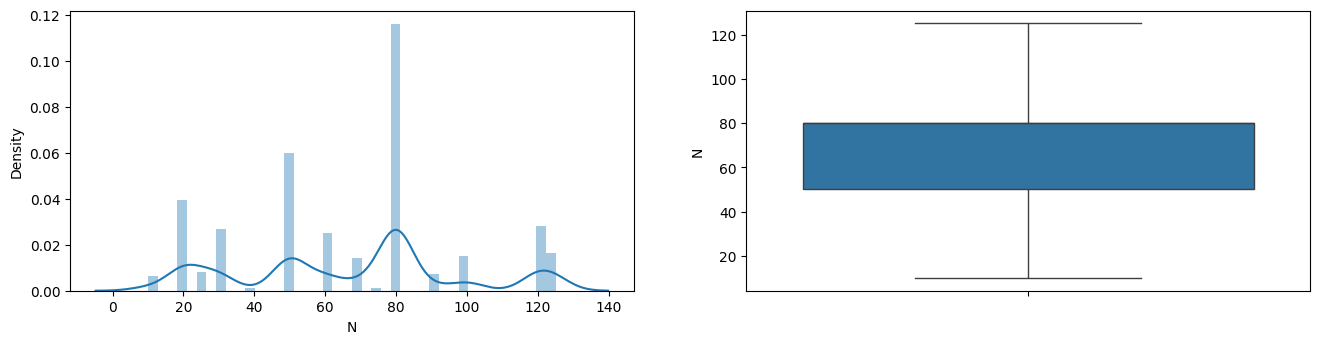

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['N'])

plt.subplot(2,2,2)
sns.boxplot(data['N'])
plt.show()

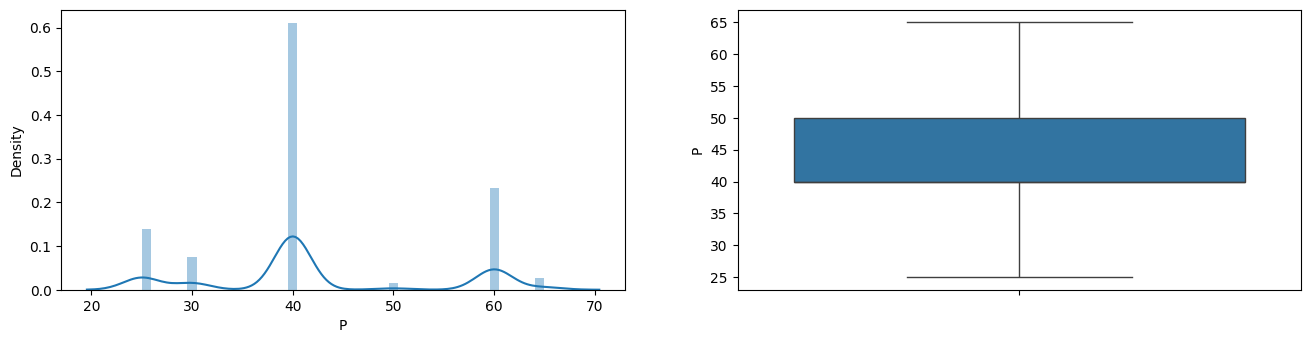

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['P'])

plt.subplot(2,2,2)
sns.boxplot(data['P'])
plt.show()

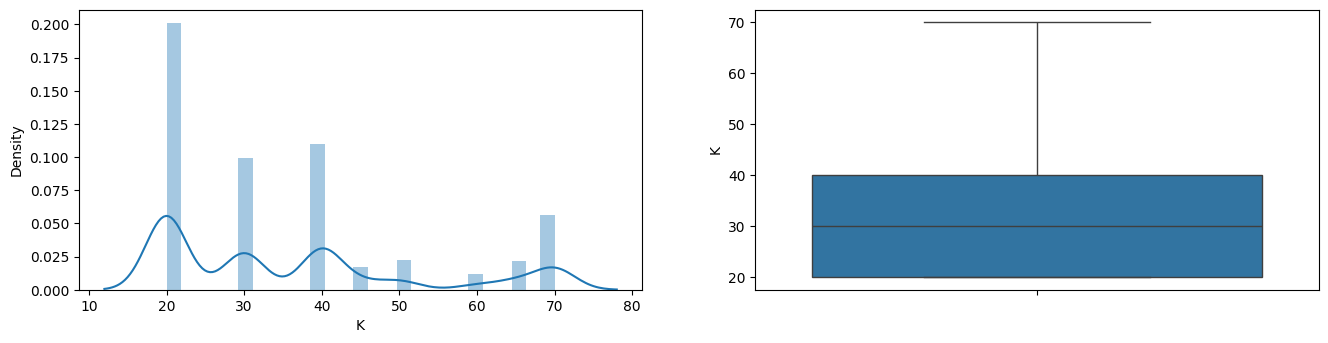

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['K'])

plt.subplot(2,2,2)
sns.boxplot(data['K'])
plt.show()

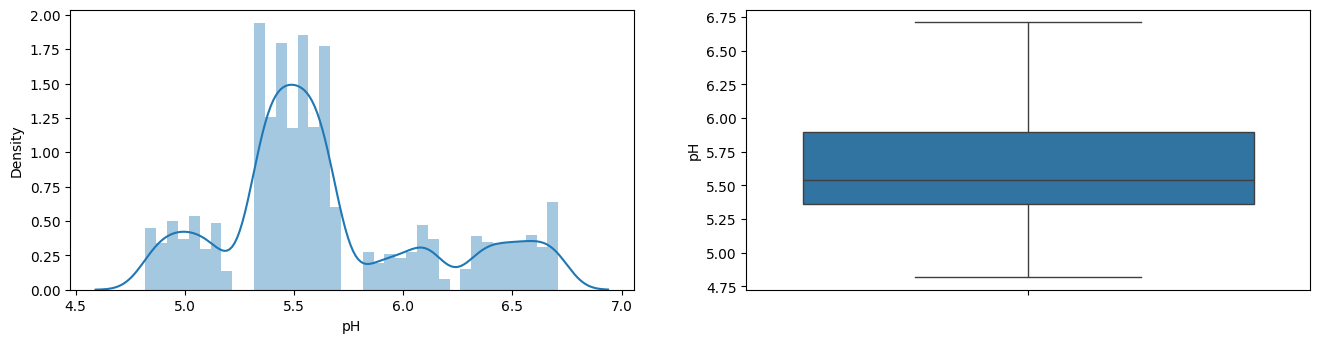

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['pH'])

plt.subplot(2,2,2)
sns.boxplot(data['pH'])
plt.show()

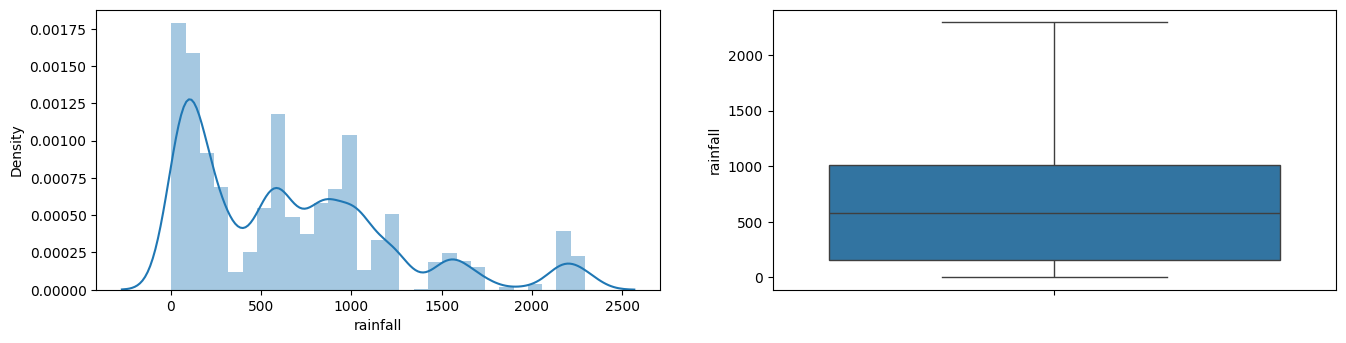

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['rainfall'])

plt.subplot(2,2,2)
sns.boxplot(data['rainfall'])
plt.show()

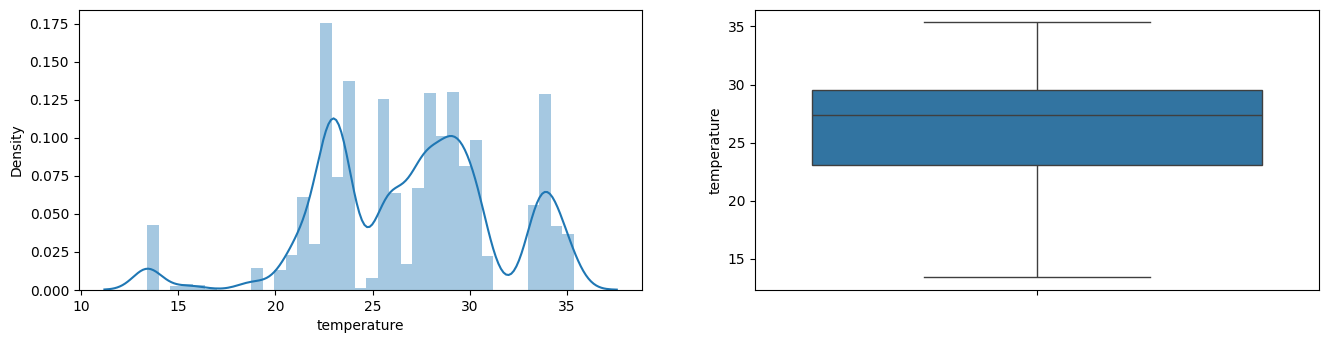

In [30]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['temperature'])

plt.subplot(2,2,2)
sns.boxplot(data['temperature'])
plt.show()

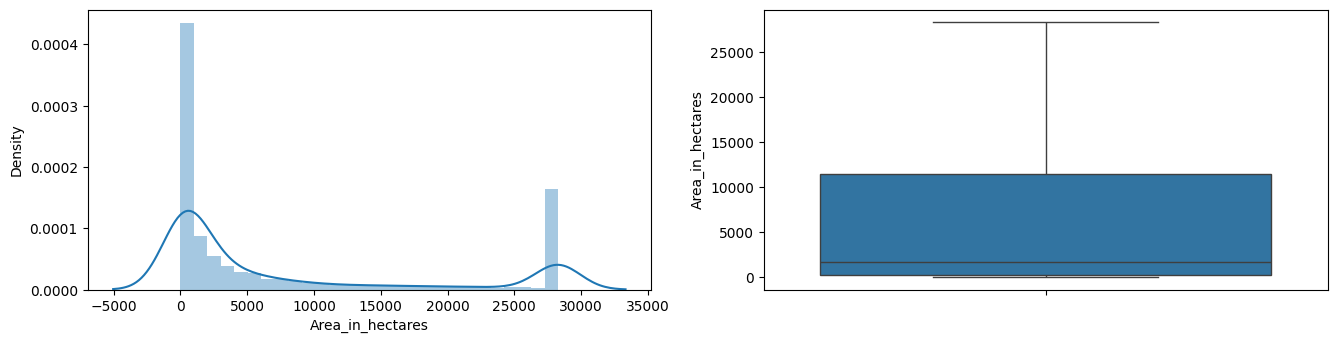

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Area_in_hectares'])

plt.subplot(2,2,2)
sns.boxplot(data['Area_in_hectares'])
plt.show()

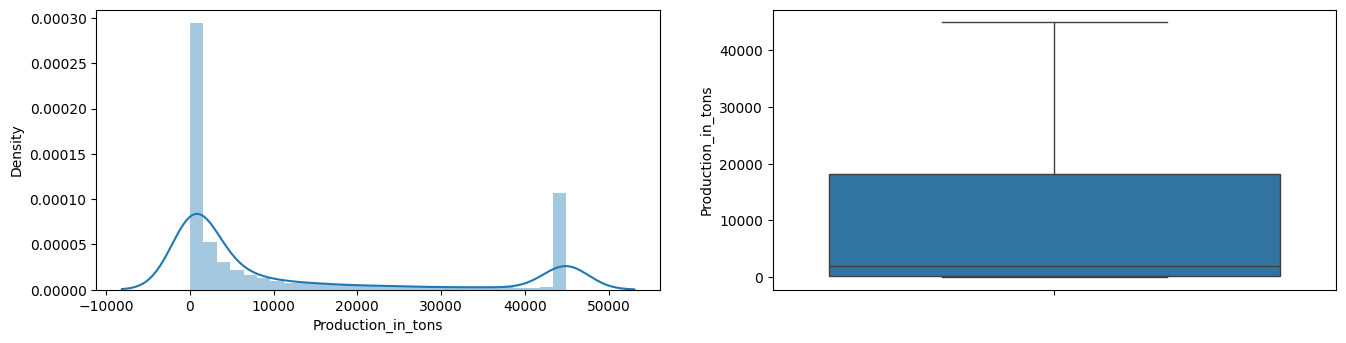

In [32]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Production_in_tons'])

plt.subplot(2,2,2)
sns.boxplot(data['Production_in_tons'])
plt.show()

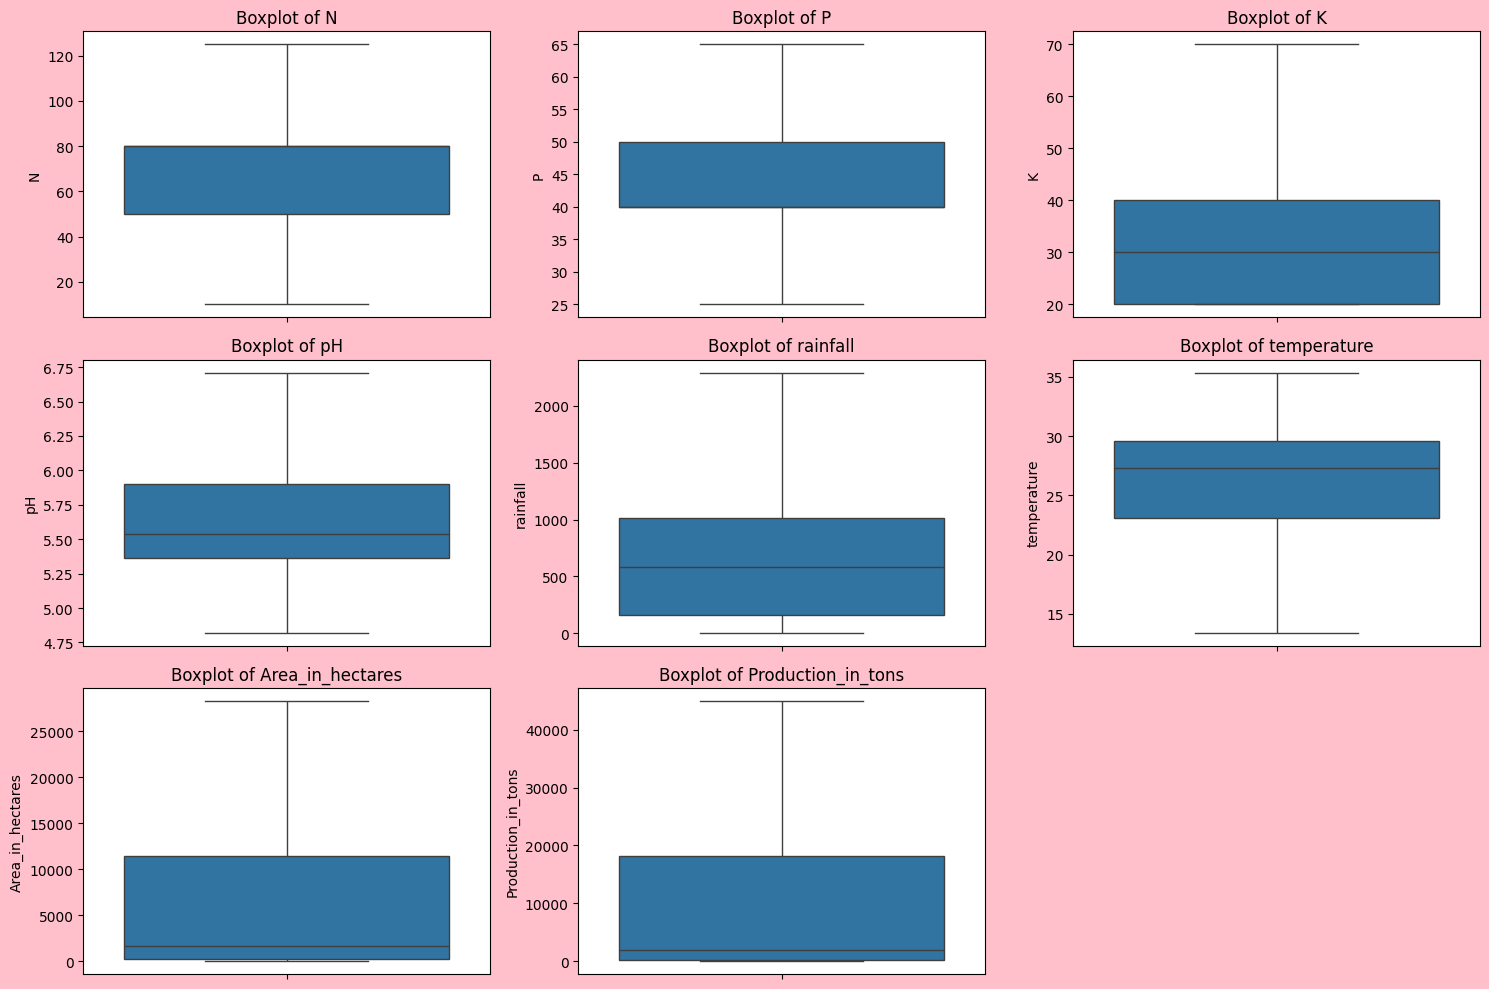

In [33]:
counter = 1
plt.figure(figsize=(15, 10),facecolor='pink')

for col in num_col:
    plt.subplot(3, 3, counter)  
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    counter += 1  

plt.tight_layout()
plt.show()

In [34]:
for col in num_col:
    skew_value = data[col].skew()
    print (col,":",skew_value)

N : 0.09496749839203446
P : 0.4255254081825508
K : 0.8564864932522908
pH : 0.6888507424055778
rainfall : 1.0132776884705987
temperature : -0.35609624356641484
Area_in_hectares : 1.1903582088137628
Production_in_tons : 1.19659013731798


In [35]:
for i in data.select_dtypes(include='number'):
    kurtosis=data[i].kurt()
    print("The kurtosis of",i,"is",kurtosis)

The kurtosis of N is -0.7301032553683915
The kurtosis of P is -0.6683414127428859
The kurtosis of K is -0.46160178977684563
The kurtosis of pH is -0.23630498985886517
The kurtosis of rainfall is 0.531391366126706
The kurtosis of temperature is 0.28378409803257787
The kurtosis of Area_in_hectares is -0.2792433054587127
The kurtosis of Production_in_tons is -0.29750692222787656
The kurtosis of target  is 1560.9117230489421


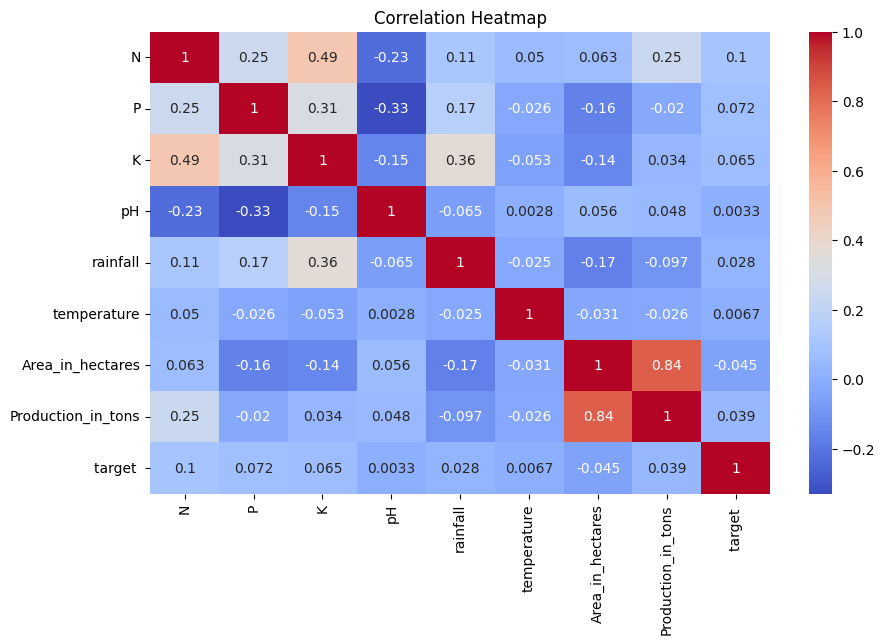

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [37]:
data["Crop_Type"].unique()

array(['kharif', 'rabi', 'summer', 'whole year'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Crop_Type'] = encoder.fit_transform(data['Crop_Type'])

In [39]:
data

,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
0,0,cotton,120.0,40.0,20.0,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,0,horsegram,20.0,60.0,20.0,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,0,jowar,80.0,40.0,40.0,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,0,maize,80.0,40.0,20.0,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,0,moong,20.0,40.0,20.0,5.68,654.34,29.266667,1300.0,500.0,0.384615
...,...,...,...,...,...,...,...,...,...,...,...
9996,2,maize,80.0,40.0,20.0,5.40,34.81,34.666667,152.0,154.0,1.013158
9997,2,moong,20.0,40.0,20.0,5.60,34.81,34.666667,488.0,211.0,0.432377
9998,3,onion,120.0,60.0,65.0,5.94,689.88,29.037273,752.0,9080.0,12.074468
9999,3,potato,125.0,60.0,70.0,5.02,689.88,29.037273,7595.0,44950.0,22.048058


In [40]:
data["Crop"].unique()

array(['cotton', 'horsegram', 'jowar', 'maize', 'moong', 'ragi', 'rice',
       'sunflower', 'wheat', 'sesamum', 'soyabean', 'rapeseed', 'jute',
       'arecanut', 'onion', 'potato', 'sweetpotato', 'tapioca',
       'turmeric', 'barley', 'banana', 'coriander', 'garlic',
       'blackpepper', 'cardamom', 'cashewnuts', 'blackgram'], dtype=object)

In [41]:
data['Crop'] = encoder.fit_transform(data['Crop'])

In [42]:
data

,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
0,0,8,120.0,40.0,20.0,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,0,10,20.0,60.0,20.0,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,0,11,80.0,40.0,40.0,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,0,13,80.0,40.0,20.0,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,0,14,20.0,40.0,20.0,5.68,654.34,29.266667,1300.0,500.0,0.384615
...,...,...,...,...,...,...,...,...,...,...,...
9996,2,13,80.0,40.0,20.0,5.40,34.81,34.666667,152.0,154.0,1.013158
9997,2,14,20.0,40.0,20.0,5.60,34.81,34.666667,488.0,211.0,0.432377
9998,3,15,120.0,60.0,65.0,5.94,689.88,29.037273,752.0,9080.0,12.074468
9999,3,16,125.0,60.0,70.0,5.02,689.88,29.037273,7595.0,44950.0,22.048058


In [45]:
from sklearn.preprocessing import StandardScaler
scaled_cols = ['Crop_Type','Crop','N','P','K','pH','rainfall','temperature','Area_in_hectares']
scaler = StandardScaler()
data[scaled_cols] = scaler.fit_transform(data[scaled_cols])

In [46]:
x=data.drop(['Production_in_tons'],axis=1)
y=data['Production_in_tons']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (7000, 10)
X_test shape: (3001, 10)
Y_train shape: (7000,)
Y_test shape: (3001,)


In [49]:
X_train.head()

,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,target
2603,0.713354,0.699372,-1.180632,-1.522628,-0.349368,1.540745,-0.950998,0.730637,-0.543534,0.337938
7738,-0.970643,-0.240065,-1.502577,-0.212033,-0.943086,-0.003614,-0.093444,-0.108787,1.953729,0.771005
1579,0.713354,0.542800,0.429094,-0.212033,0.244350,-0.462748,-0.875260,-0.223580,-0.603092,2.787540
5058,-0.970643,0.542800,0.429094,-0.212033,0.244350,-0.212311,1.825936,-2.896466,1.319109,0.697012
5753,1.555353,-0.083492,1.716874,1.535427,1.728646,1.039872,0.634516,0.498116,-0.697250,8.941406


In [50]:
X_test.head()

,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,target
6252,-0.970643,0.699372,-1.180632,-1.522628,-0.349368,1.707703,0.225243,0.805970,1.953729,0.492147
4684,0.713354,0.542800,0.429094,-0.212033,0.244350,-0.629706,-0.831512,0.501051,-0.709634,2.800000
1731,-0.970643,-0.396638,0.429094,-0.212033,-0.943086,-0.504487,1.016723,-0.919514,-0.711808,2.460784
4742,1.555353,1.482237,-1.341604,1.535427,2.025505,-1.297537,1.460045,-0.226842,-0.703773,2.812834
4521,-0.970643,-0.396638,0.429094,-0.212033,-0.943086,-0.295790,-0.141603,1.536341,1.583242,0.612987


In [51]:
Y_train.head()

2603   -0.663422
7738    1.937858
1579   -0.495889
5058    0.182402
5753   -0.566389
Name: Production_in_tons, dtype: float64

In [52]:
Y_test.head()

6252    0.402824
4684   -0.680211
1731   -0.686022
4742   -0.669879
4521    0.176473
Name: Production_in_tons, dtype: float64

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

               Feature       VIF
0            Crop_Type  1.516553
1                 Crop  1.224011
2                    N  1.751711
3                    P  1.293563
4                    K  2.102906
5                   pH  1.182221
6             rainfall  1.200726
7          temperature  1.034214
8     Area_in_hectares  4.242106
9   Production_in_tons  4.200297
10             target   1.027664


In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [55]:
Y_pred_lr = model.predict(X_test)

In [56]:
mse = mean_squared_error(Y_test,Y_pred_lr)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.23937569334664777


In [57]:
mse = mean_squared_error(Y_test, Y_pred_lr)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.4892603533361842


In [58]:
mae = mean_absolute_error(Y_test, Y_pred_lr)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.31028041492035446


In [59]:
r2 = r2_score(Y_test,Y_pred_lr)
print(f'R-squared: {r2}')

R-squared: 0.7641577374655504


In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [62]:
y_pred_knn = knn_regressor.predict(X_test)

In [63]:
mse = mean_squared_error(Y_test, y_pred_knn)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.11


In [64]:
rmse = mean_squared_error(Y_test, y_pred_knn)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.33024632103546986


In [65]:
mae = mean_absolute_error(Y_test, y_pred_knn)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.14221967184937395


In [66]:
r2 = r2_score(Y_test,y_pred_knn)
print(f'R-squared: {r2}')

R-squared: 0.8925472437877514


In [67]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [68]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [69]:
y_pred_dt = dt_regressor.predict(X_test)

In [70]:
mse_dt = mean_squared_error(Y_test, y_pred_dt)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.11


In [71]:
rmse = mean_squared_error(Y_test, y_pred_dt)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.33024632103546986


In [72]:
mae = mean_absolute_error(Y_test, y_pred_dt)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.03946489264593027


In [73]:
r2 = r2_score(Y_test,y_pred_dt)
print(f'R-squared: {r2}')

R-squared: 0.9767364111527982


In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [76]:
y_pred_rf = rf_regressor.predict(X_test)

In [77]:
mse = mean_squared_error(Y_test, y_pred_rf)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.02


In [78]:
rmse = mean_squared_error(Y_test, y_pred_rf)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.12401918374224612


In [79]:
mae = mean_absolute_error(Y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.030351196904896818


In [80]:
r2 = r2_score(Y_test,y_pred_rf)
print(f'R-squared: {r2}')

R-squared: 0.9848462778303482


In [81]:
print("Performance of various ML models used:")
print('--------------------------------------')
print("Linear Regression:",str(np.round(model.score(X_test,Y_test)*100,2)) + '%')
print("K Neighbors Regressor:",str(np.round(knn_regressor.score(X_test,Y_test)*100,2)) + '%')
print("Decision Tree Regressor:",str(np.round(dt_regressor.score(X_test,Y_test)*100,2)) + '%')
print("Random Forest Regressor:",str(np.round(rf_regressor.score(X_test,Y_test)*100,2)) + '%')

Performance of various ML models used:
--------------------------------------
Linear Regression: 76.42%
K Neighbors Regressor: 89.25%
Decision Tree Regressor: 97.67%
Random Forest Regressor: 98.48%


In [82]:
# Make predictions using the Linear Regression (LR) model on the test data
y_pred1 = model.predict(X_test)

# Make predictions using the KNeighbour Regressor model on the test data
y_pred2 = knn_regressor.predict(X_test)

# Make predictions using the Random Forest Regressor (RF) model on the test data
y_pred3 = rf_regressor.predict(X_test)

# Make predictions using the Decision Tree model on the test data
y_pred4 = dt_regressor.predict(X_test)

# DataFrame to compare actual and predicted values
df = pd.DataFrame({'Actual': Y_test, 'LR': Y_pred_lr, 'KNN': y_pred_knn, 'RF': y_pred_rf, 'DT': y_pred_dt})
df

,Actual,LR,KNN,RF,DT
6252,0.402824,1.399869,0.394998,1.205797,1.265730
4684,-0.680211,-0.497884,-0.463252,-0.680684,-0.676571
1731,-0.686022,-0.719244,-0.618359,-0.685819,-0.684848
4742,-0.669879,-0.576946,-0.492759,-0.671228,-0.671758
4521,0.176473,1.289210,0.771761,0.177227,0.197371
...,...,...,...,...,...
1074,-0.569970,0.052782,-0.615268,-0.579416,-0.585937
3063,1.937858,1.656015,1.937858,1.937858,1.937858
6487,1.937858,1.636781,1.573989,1.879515,1.937858
4705,-0.639590,-0.566116,-0.549444,-0.638240,-0.635011


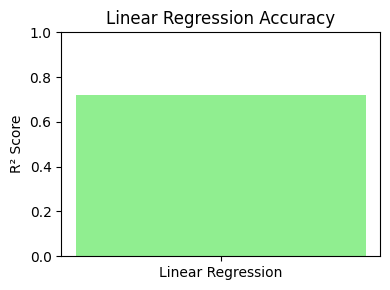

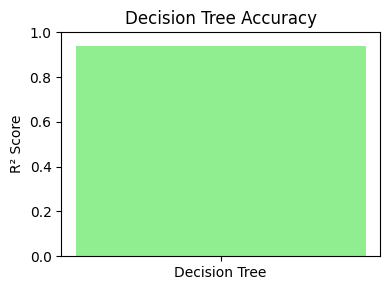

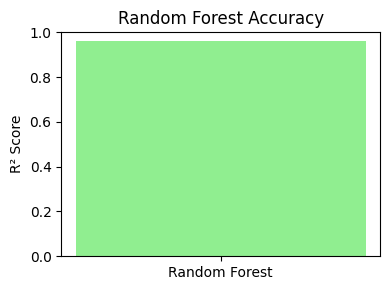

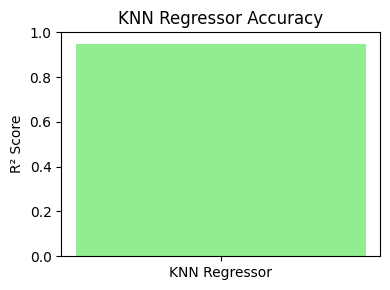

In [83]:
import matplotlib.pyplot as plt

model_scores = {
    "Linear Regression": 0.72,
    "Decision Tree": 0.94,
    "Random Forest": 0.96,
    "KNN Regressor": 0.95
}

# Create individual bar plots
for model, score in model_scores.items():
    plt.figure(figsize=(4, 3))
    plt.bar(model, score, color='lightgreen')
    plt.ylim(0, 1)
    plt.title(f"{model} Accuracy")
    plt.ylabel("R² Score")
    plt.tight_layout()
    plt.show()